In [1]:
#For data wrangling
import pandas as pd
import numpy as np

#For visualization
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows=None
pd.options.display.max_columns=None


# Acquire


In [2]:
#Read the data frame
df=pd.read_csv('modeling_churn.csv')
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
#Drop the columns as explained above
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [8]:
#Review the top rows
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis


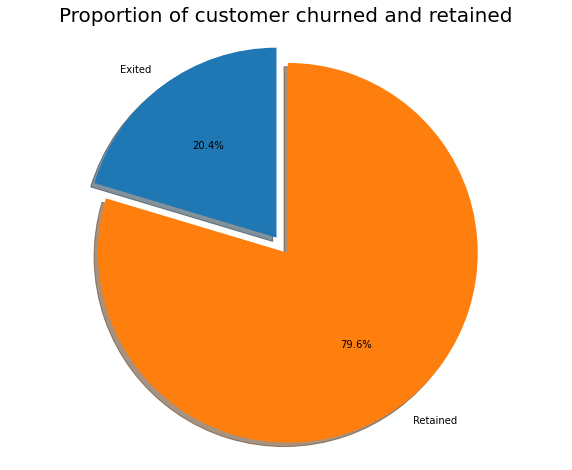

In [16]:
labels='Exited', 'Retained'
sizes=[df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode=(0,0.1)
fig1, ax1=plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Proportion of customer churned and retained', size=20)
plt.show()

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

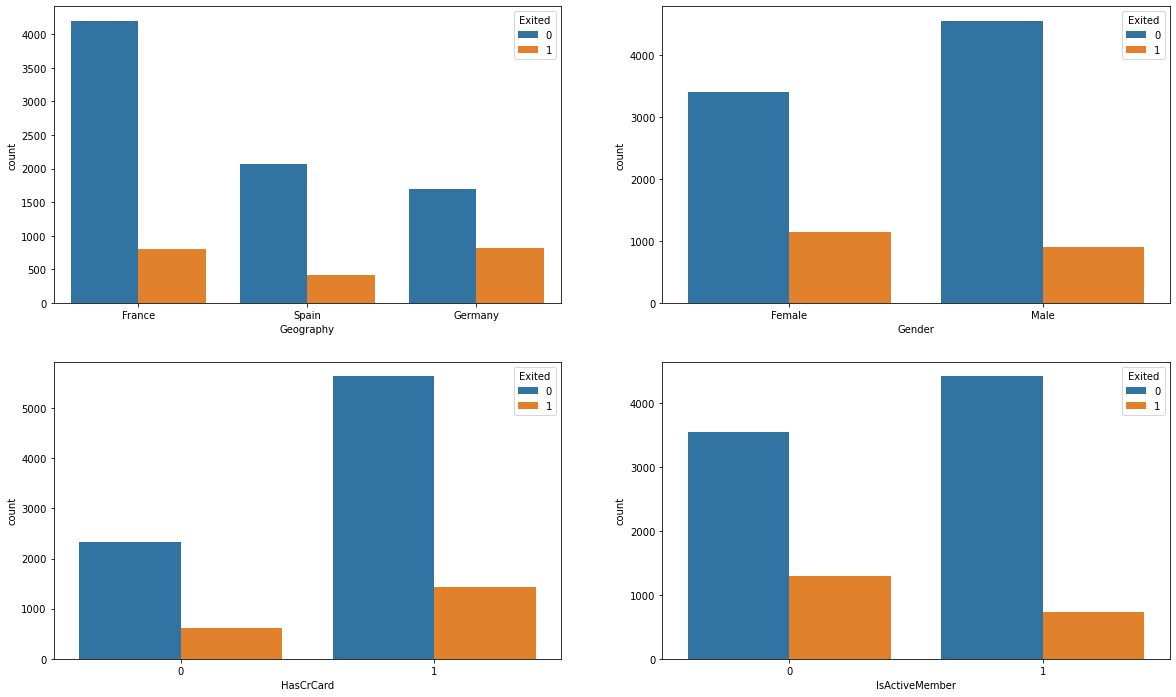

In [23]:
#We first review the 'Status' relation with categorical variables
fig, axarr=plt.subplots(2,2, figsize=(20,12))
sns.countplot(x='Geography',hue='Exited', data=df, ax=axarr[0][0])
sns.countplot(x='Gender',hue='Exited',data=df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue='Exited',data=df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue='Exited',data=df, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

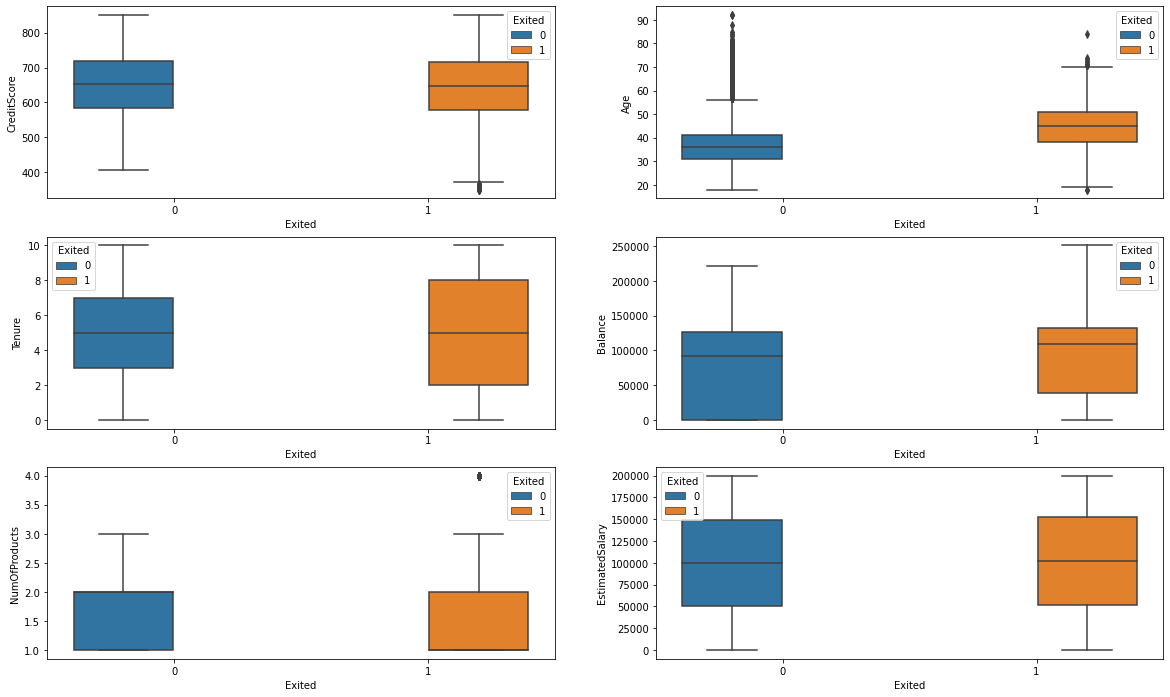

In [24]:
#Relations based on the continuous data attributes 
fig, axarr=plt.subplots(3,2, figsize=(20,12))
sns.boxplot(y='CreditScore',x='Exited',hue='Exited',data=df, ax=axarr[0][0])
sns.boxplot(y='Age',x='Exited',hue='Exited',data=df, ax=axarr[0][1])
sns.boxplot(y='Tenure',x='Exited',hue='Exited',data=df, ax=axarr[1][0])
sns.boxplot(y='Balance',x='Exited',hue='Exited',data=df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x='Exited',hue='Exited',data=df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x='Exited',hue='Exited',data=df, ax=axarr[2][1])

### Feature Engineering 

In [25]:
#Split Train, Test data
df_train=df.sample(frac=0.8,random_state=200)
df_test=df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


In [ ]:
df_train['BalanceSalaryRatio']=df_train